# Resonant Filters

So far, the filter designs we’ve concentrated on have employed either capacitors or inductors, but never *both* at the same time. We should know by now that combinations of L and C will tend to resonate, and this property can be exploited in designing band-pass and band-stop filter circuits.

Series LC circuits give minimum impedance at resonance, while parallel LC (“tank”) circuits give maximum impedance at their resonant frequency. Knowing this, we have two basic strategies for designing either band-pass or band-stop filters.

For band-pass filters, the two basic resonant strategies are this: series LC to pass a signal, or parallel LC to short a signal. The two schemes will be contrasted and simulated here:

Recall that the resonant frequency ($f_\mathrm{res}$) is defined as the fequency at which:  

$$ X_L = X_C$$

$$ 2\pi f_\mathrm{res} L = \frac{1}{2\pi f_\mathrm{res} C}$$

$$ f_\mathrm{res}^2 = \frac{1}{4\pi^2L C}$$

Finally, 
$$ f_\mathrm{res} = \frac{1}{2\pi\sqrt{LC}}$$

In [2]:
import CircuitTheory.filters as filters
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f_res(L: float, C: float):
    """ The resonant frequency in Hertz. """
    return 1/(2*np.pi*np.sqrt(L*C))

# Series LC Filter

This kind of filter is an RLC series circuit of the form:  $\mathrm{E}--\mathrm{L}_1--\mathrm{C}_1--\mathrm{load}$.

This kind of filter has minimum impedance at resonance meaning the voltage dropped across the load is at it's highest at this frequency.

### Generalized Equation(s)

Via KVL and Ohm's Law,
$$ E = ZI$$

and,
$$ Z = R_\mathrm{load} + j \cdot (X_{\mathrm{L}1} - X_{\mathrm{C}1})$$

At resonance the imaginary part of $Z$ is equal to zero;  But, at any other frequency, the imaginary part is non-zero, hence the minimum impedance occuring at resonance.

$$ I = \frac{E}{Z}$$

$$ |I| = \frac{|E|}{|Z|} = \frac{|E|}{\sqrt{R_\mathrm{load}^2 + \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2}}$$

The output voltage signal is given by:  

$$ E_\mathrm{load} = R_\mathrm{load} I$$

And, finally, the amplitude of said signal is given by:

$$ |E_\mathrm{load}| = R_\mathrm{load}|I|$$

In [4]:
Resistor = filters.Resistor
Capacitor = filters.Capacitor
Inductor = filters.Inductor

## Specific Example

![lc-series-example](https://www.allaboutcircuits.com/uploads/articles/series-resonant-lc-band-pass-filter.png)

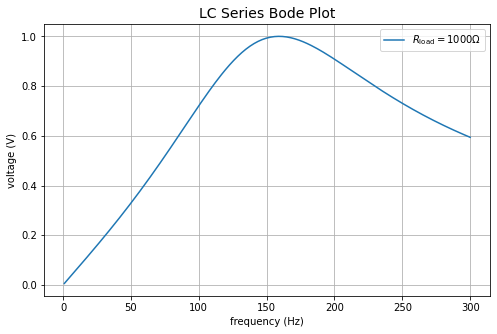

In [5]:
L1 = Inductor(1)
C1 = Capacitor(1e-6)
load = Resistor(1000)

flt = filters.SeriesLCResonantFilter(complex(1, 0), L1, C1, load)

# Create frequency domain.
f = np.linspace(1, 300, num=200)

mag_E_load = np.array(list(map(flt.load_voltage_mag, f)))

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('LC Series Bode Plot', size=14)
ax.set_xlabel('frequency (Hz)', size=10)
ax.set_ylabel('voltage (V)', size=10)
ax.grid()

L = ax.plot(f, mag_E_load, label=r'$R_\mathrm{load} = 1000\Omega$')
ax.legend()

The resonant frequency of this filter is:

In [6]:
print(f'f_res = {f_res(L = L1.inductance, C = C1.capacitance):.2f}Hz.')

f_res = 159.15Hz.


### Different Load Resistance

Suppose we were to change the load's resistance, but keep everything else the same.  The resonant frequency does not depend on the resistance, so that will remain the same.  The only thing that may change is the shape of the bode plot (plot of the amplitude of the output voltage signal).

**Decreasing the load resistance** to $500\Omega$ yields the following bode plot.

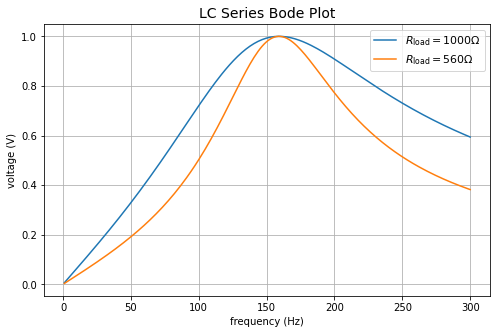

In [7]:
del load
load = Resistor(560)

flt = filters.SeriesLCResonantFilter(complex(1, 0), L1, C1, load)



fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('LC Series Bode Plot', size=14)
ax.set_xlabel('frequency (Hz)', size=10)
ax.set_ylabel('voltage (V)', size=10)
ax.grid()

L = ax.plot(f, mag_E_load, label=r'$R_\mathrm{load} = 1000\Omega$')
mag_E_load = np.array(list(map(flt.load_voltage_mag, f)))
L.extend(ax.plot(f, mag_E_load, label=r'$R_\mathrm{load} = 560\Omega$'))

ax.legend(fontsize=11)


Decreasing the load made the curve steeper and thus the frequency band narrower.

To find out why this is and determine if this relationship holds across the various resistances that a load may have, first let's differentiate the amplitude of the output signal with respect to the frequency.

$$ \frac{\mathrm{d}|E_\mathrm{load}|}{\mathrm{d}f} = R_\mathrm{load} \frac{\mathrm{d}|I|}{\mathrm{d}f}$$

\begin{align*}
    \frac{\mathrm{d}|I|}{\mathrm{d}f} &= -\frac{|E|}{|Z|^3} \cdot 2\big(X_{\mathrm{L}1} - X_{\mathrm{C}1}\big) \cdot \left(2\pi L_1 + \frac{1}{2\pi f^2 C_1} \right) \\ \\
     &= -\frac{|E|}{|Z|^3} \cdot 2\left(2\pi f L_1 - \frac{1}{2\pi f C_1}\right) \cdot \left(2\pi L_1 + \frac{1}{2\pi f^2 C_1} \right) 
\end{align*}

Now suppose we have two series LC filters that only differ by their load resistances, $R_1$ and $R_2$, and that:  

$$ R_1 < R_2$$

It should then follow that:  

$$ |E_1|'(f) > |E_2|'(f) \quad \text{where }f \ne f_\mathrm{res}$$

and,
$$ |E_1|'(f_\mathrm{res}) = |E_2|'(f_\mathrm{res}) = 0$$

Dividing through by the last two factors on the right of the identity $|I|'(f)$ and $-|E|$ gives:

$$ \frac{R_1}{|Z_1|^3} > \frac{R_2}{|Z_2|^3}$$

$$ \frac{|Z_2|^3}{|Z_1|^3} > \frac{R_2}{R_1} > 1$$

Which leaves us with:
$$ \frac{|Z_2|^2}{|Z_1|^2} = \frac{\big|R_2^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2 \big|}{\big|R_1^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2\big|} > 1$$

$$ R_2^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2 > R_1^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2$$

$$ R_2^2 > R_1^2$$

$$ R_2 > R_1$$

### Different L:C Ratio

What happends if we change the inductance:capacitance ($L:C$) ratio such that the resonant frequency remains the same but keep every thing else the same?

First, let's consider the case where we **increase the capacitance** and decrease the inductance accordingly.

The *generic equation* is:  

$$ \frac{1}{2\pi \sqrt{L_\mathrm{old}C_\mathrm{old}}} = \frac{1}{2\pi \sqrt{L_\mathrm{new}C_\mathrm{new}}}$$

The only unkown quantity in the above equation is $L_\mathrm{new}$.  To find it we multiply throughout by $2\pi$ and square both sides.

$$ \frac{1}{L_\mathrm{old}C_\mathrm{old}} = \frac{1}{L_\mathrm{new}C_\mathrm{new}}$$

Multiplying thoughout the above equation by $L_\mathrm{old}C_\mathrm{old}L_\mathrm{new}$ gives:  

$$ L_\mathrm{new} = \frac{L_\mathrm{old}C_\mathrm{old}}{C_\mathrm{new}} $$

For a *specific example*, suppose that the capacitance is given by:  $C = 10\mu\mathrm{F}$.  The new inductance is given by:  

$$ L = \frac{1\mathrm{H}\,1\mu\mathrm{F}}{10\mu\mathrm{F}} = 0.1\mathrm{H}$$

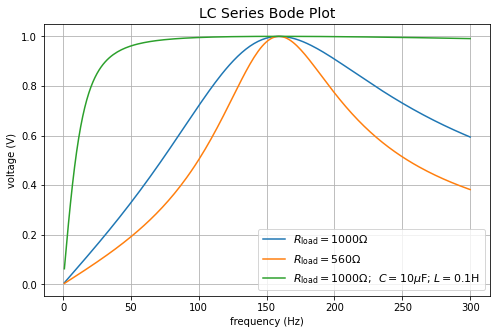

In [8]:
del L1, C1, load, flt
L1 = Inductor(0.1)
C1 = Capacitor(1e-5)
load = Resistor(1000)

flt = filters.SeriesLCResonantFilter(complex(1,0), L1, C1, load)

mag_E_load = np.array(list(map(flt.load_voltage_mag, f)))

L.extend(ax.plot(f, mag_E_load, label=r'$R_\mathrm{load}=1000\Omega$;  $C=10\mu\mathrm{F}$; $L=0.1\mathrm{H}$'))
ax.legend(fontsize=11)
fig

This change to both $L$ and $C$ made the frequency band *much* wider.  It is mostly off the chart!

In [12]:
flt.load_voltage_mag(1000)

0.8527912430415372

Now, what if we **increase the inductance** instead?  Suppose that the inductance is:  $L=10\mathrm{H}$.  The capacitance is now:  

$$ C = \frac{1\mathrm{H}\cdot1\mu\mathrm{F}}{10\mathrm{H}} = 0.1\mu\mathrm{F}$$

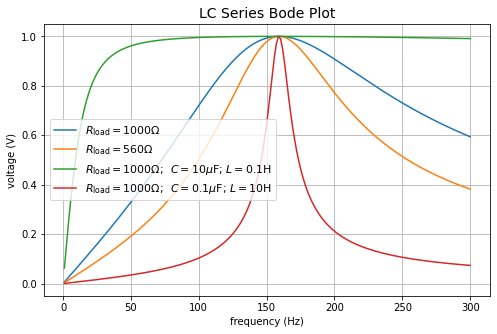

In [13]:
del L1, C1, flt
L1 = Inductor(10)
C1 = Capacitor(1e-7)

flt = filters.SeriesLCResonantFilter(complex(1,0), L1, C1, load)

mag_E_load = np.array(list(map(flt.load_voltage_mag, f)))

L.extend(ax.plot(f, mag_E_load, label=r'$R_\mathrm{load}=1000\Omega$;  $C=0.1\mu\mathrm{F}$; $L=10\mathrm{H}$'))
ax.legend(fontsize=11)
fig

As expected, the curve got steeper and the bandwidth got smaller.

## Finding the Bandwidth

So far, we've talked about the bandwidth and how it relates to the various parameters quite a bit, but how do we actually determine what the bandwidth actually is at a certain voltage level? 

### General Case

To find the bandwidth at $|E_\mathrm{load}| = 0.8 \mathrm{V}$ we must find the solution to the following equation:  

$$ |E_\mathrm{load}|(f) - 0.8 \mathrm{V} = 0$$

$$ |E_\mathrm{load}| := |E_\mathrm{load}|(f) = \frac{R_\mathrm{load}|E|}{\sqrt{R_\mathrm{load}^2 + \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2}} = 0.8\mathrm{V}$$

$$ \frac{R_\mathrm{load}^2|E|^2}{0.64\mathrm{V}^2} = R_\mathrm{load}^2 + \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2$$

$$ X_{\mathrm{L}1} - X_{\mathrm{C}1}  = \pm \sqrt{\frac{R_\mathrm{load}^2|E|^2}{0.64\mathrm{V}^2} - R_\mathrm{load}^2}$$

Multiplying throughout by $f$ gives the following quadratic equation (in terms of $f$):  

$$ 2\pi L_1 f^2 - \frac{1}{2\pi C_1} = \pm\, f \cdot\sqrt{\frac{R_\mathrm{load}^2|E|^2}{0.64\mathrm{V}^2} - R_\mathrm{load}^2}$$

Let $a$, $b$, and $c$ be defined as the leading, middle, and trailing coefficient of the above quadratic equation respectively.  It then follows that, via the Quadratic Formula,  

$$ f = \frac{b \pm \sqrt{b^2-4ac}}{2a}$$

Note that, since $b$ has a negative and a positive part, the solution to the quadratic equation will have four parts: two negative parts, and two positive parts;  But since the frequency can *never* be negative, only the positive parts may apply, leaving us with a two part applicable solution.  The difference between these two parts is equal to the bandwidth at the specified voltage level.

In [17]:
def band_limits(E: float, L: float, C: float, R_l: float, E_lvl: float):
    """ Returns the min and max frequencies that can occur at or above the given voltage level ('E_lvl'). """
    
    # Define the Quadratic Coefficients.
    
    a = 2*np.pi*L
    b = np.sqrt(R_l**2 * E**2 / E_lvl**2 - R_l**2)
    c = -1/(2*np.pi*C)
    
    # Obtain the three part solution to the associated quadratic equation in terms of 'f'.
    F = [(b + np.sqrt(b**2 - 4*a*c))/(2*a), (b - np.sqrt(b**2 - 4*a*c))/(2*a), (-b + np.sqrt(b**2 - 4*a*c))/(2*a)]
    
    # Return the positive parts of the solution.
    return tuple(f for f in F if f > 0)

def bandwidth(E: float, L: float, C: float, R_l: float, E_lvl: float):
    """ Returns the frequency bandwidth at the given voltage level ('E_lvl'). """
    f = band_limits(E, L, C, R_l, E_lvl)
    return abs(f[0]-f[1])

### Specific Case

Next, let's look at the specific example found in the previous section using the initial parameters of:  

* $R_\mathrm{load} = 1000\Omega$
* $C_1 = 1\mu\mathrm{F}$
* $L_1 = 1\mathrm{H}$

In [22]:
F = band_limits(1, 10, 1e-7, 1000, 0.8)
F

(165.23511996295127, 153.2984992310591)

### Find the Resistance

Now, what if we wanted to find the load resistance, henceforth '$R$', when one of the frequency band limits is given at the desired voltage level?  First, recall that:

$$ \frac{R^2|E|^2}{0.64\mathrm{V}^2} = R^2 + \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2$$

$$ R^2\left(\frac{|E|^2}{0.64\mathrm{V}^2} - 1\right) = \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2$$

$$ R^2 \frac{|E|^2 - 0.64\mathrm{V}^2}{0.64\mathrm{V}^2} = \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2$$

Finally,
$$ R = R_\mathrm{load} = \frac{0.8\mathrm{V}\big|X_{\mathrm{L}1} - X_{\mathrm{C}1}\big|}{\sqrt{|E|^2 - 0.64\mathrm{V}^2}}$$